In [281]:
import numpy as np
import pandas as pd

In [282]:
books = pd.read_csv('Books.csv')
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')

C:\Users\adity\AppData\Local\Temp\ipykernel_49544\1748781244.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


In [283]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [284]:
 users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [285]:
ratings = ratings[ratings['Book-Rating'] != 0]
ratings

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6
...,...,...,...
1149773,276704,0806917695,5
1149775,276704,1563526298,9
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [286]:
print(books.shape)

(271360, 8)


In [287]:
print(users.shape)

(278858, 3)


In [288]:
print(ratings.shape)

(433671, 3)


In [289]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [290]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [291]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [292]:
books.duplicated().sum()

0

In [293]:
ratings.duplicated().sum()

0

In [294]:
users.duplicated().sum()

0

In [295]:
ratings['Book-Rating'].value_counts().sort_index()


Book-Rating
1       1770
2       2759
3       5996
4       8904
5      50974
6      36924
7      76457
8     103736
9      67541
10     78610
Name: count, dtype: int64

In [296]:
import sys
print(sys.executable)


C:\Users\adity\.anaconda\ANACONDA\envs\ml\python.exe


In [297]:
import matplotlib.pyplot as plt
print("matplotlib is working")


matplotlib is working


In [298]:
ratings

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6
...,...,...,...
1149773,276704,0806917695,5
1149775,276704,1563526298,9
1149777,276709,0515107662,10
1149778,276721,0590442449,10


<Axes: >

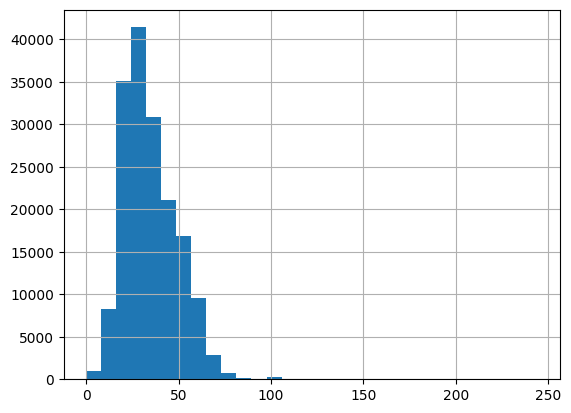

In [299]:
users['Age'].describe()
users['Age'].hist(bins=30)


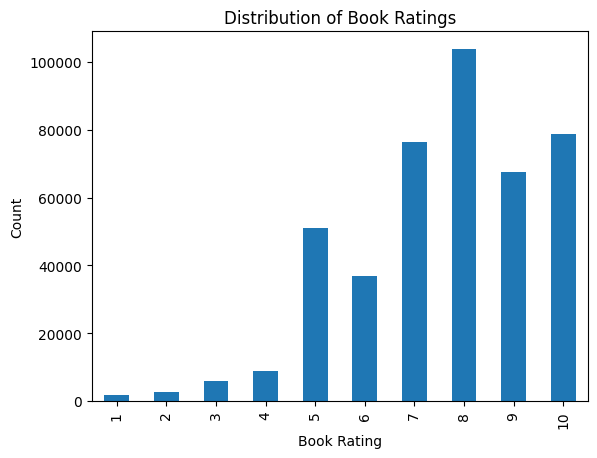

In [300]:
ratings.iloc[:, 2].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Book Rating")
plt.ylabel("Count")
plt.title("Distribution of Book Ratings")
plt.show()


In [301]:
ur = ratings.merge(users, on='User-ID')


In [302]:
ur[['Age','Book-Rating']].corr()


,Age,Book-Rating
Age,1.000000,0.019501
Book-Rating,0.019501,1.000000


In [303]:
import seaborn as sns


<Axes: xlabel='Book-Rating', ylabel='Age'>

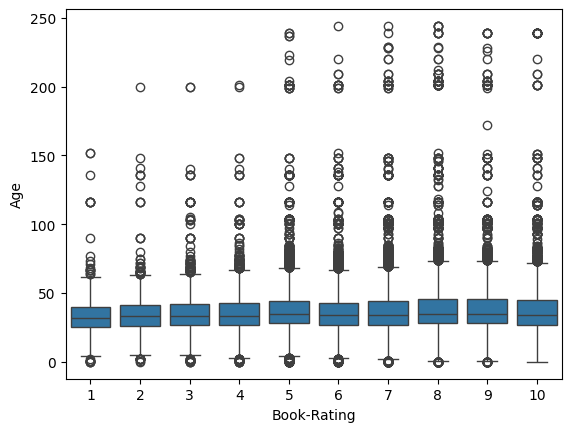

In [304]:
sns.boxplot(x='Book-Rating', y='Age', data=ur)


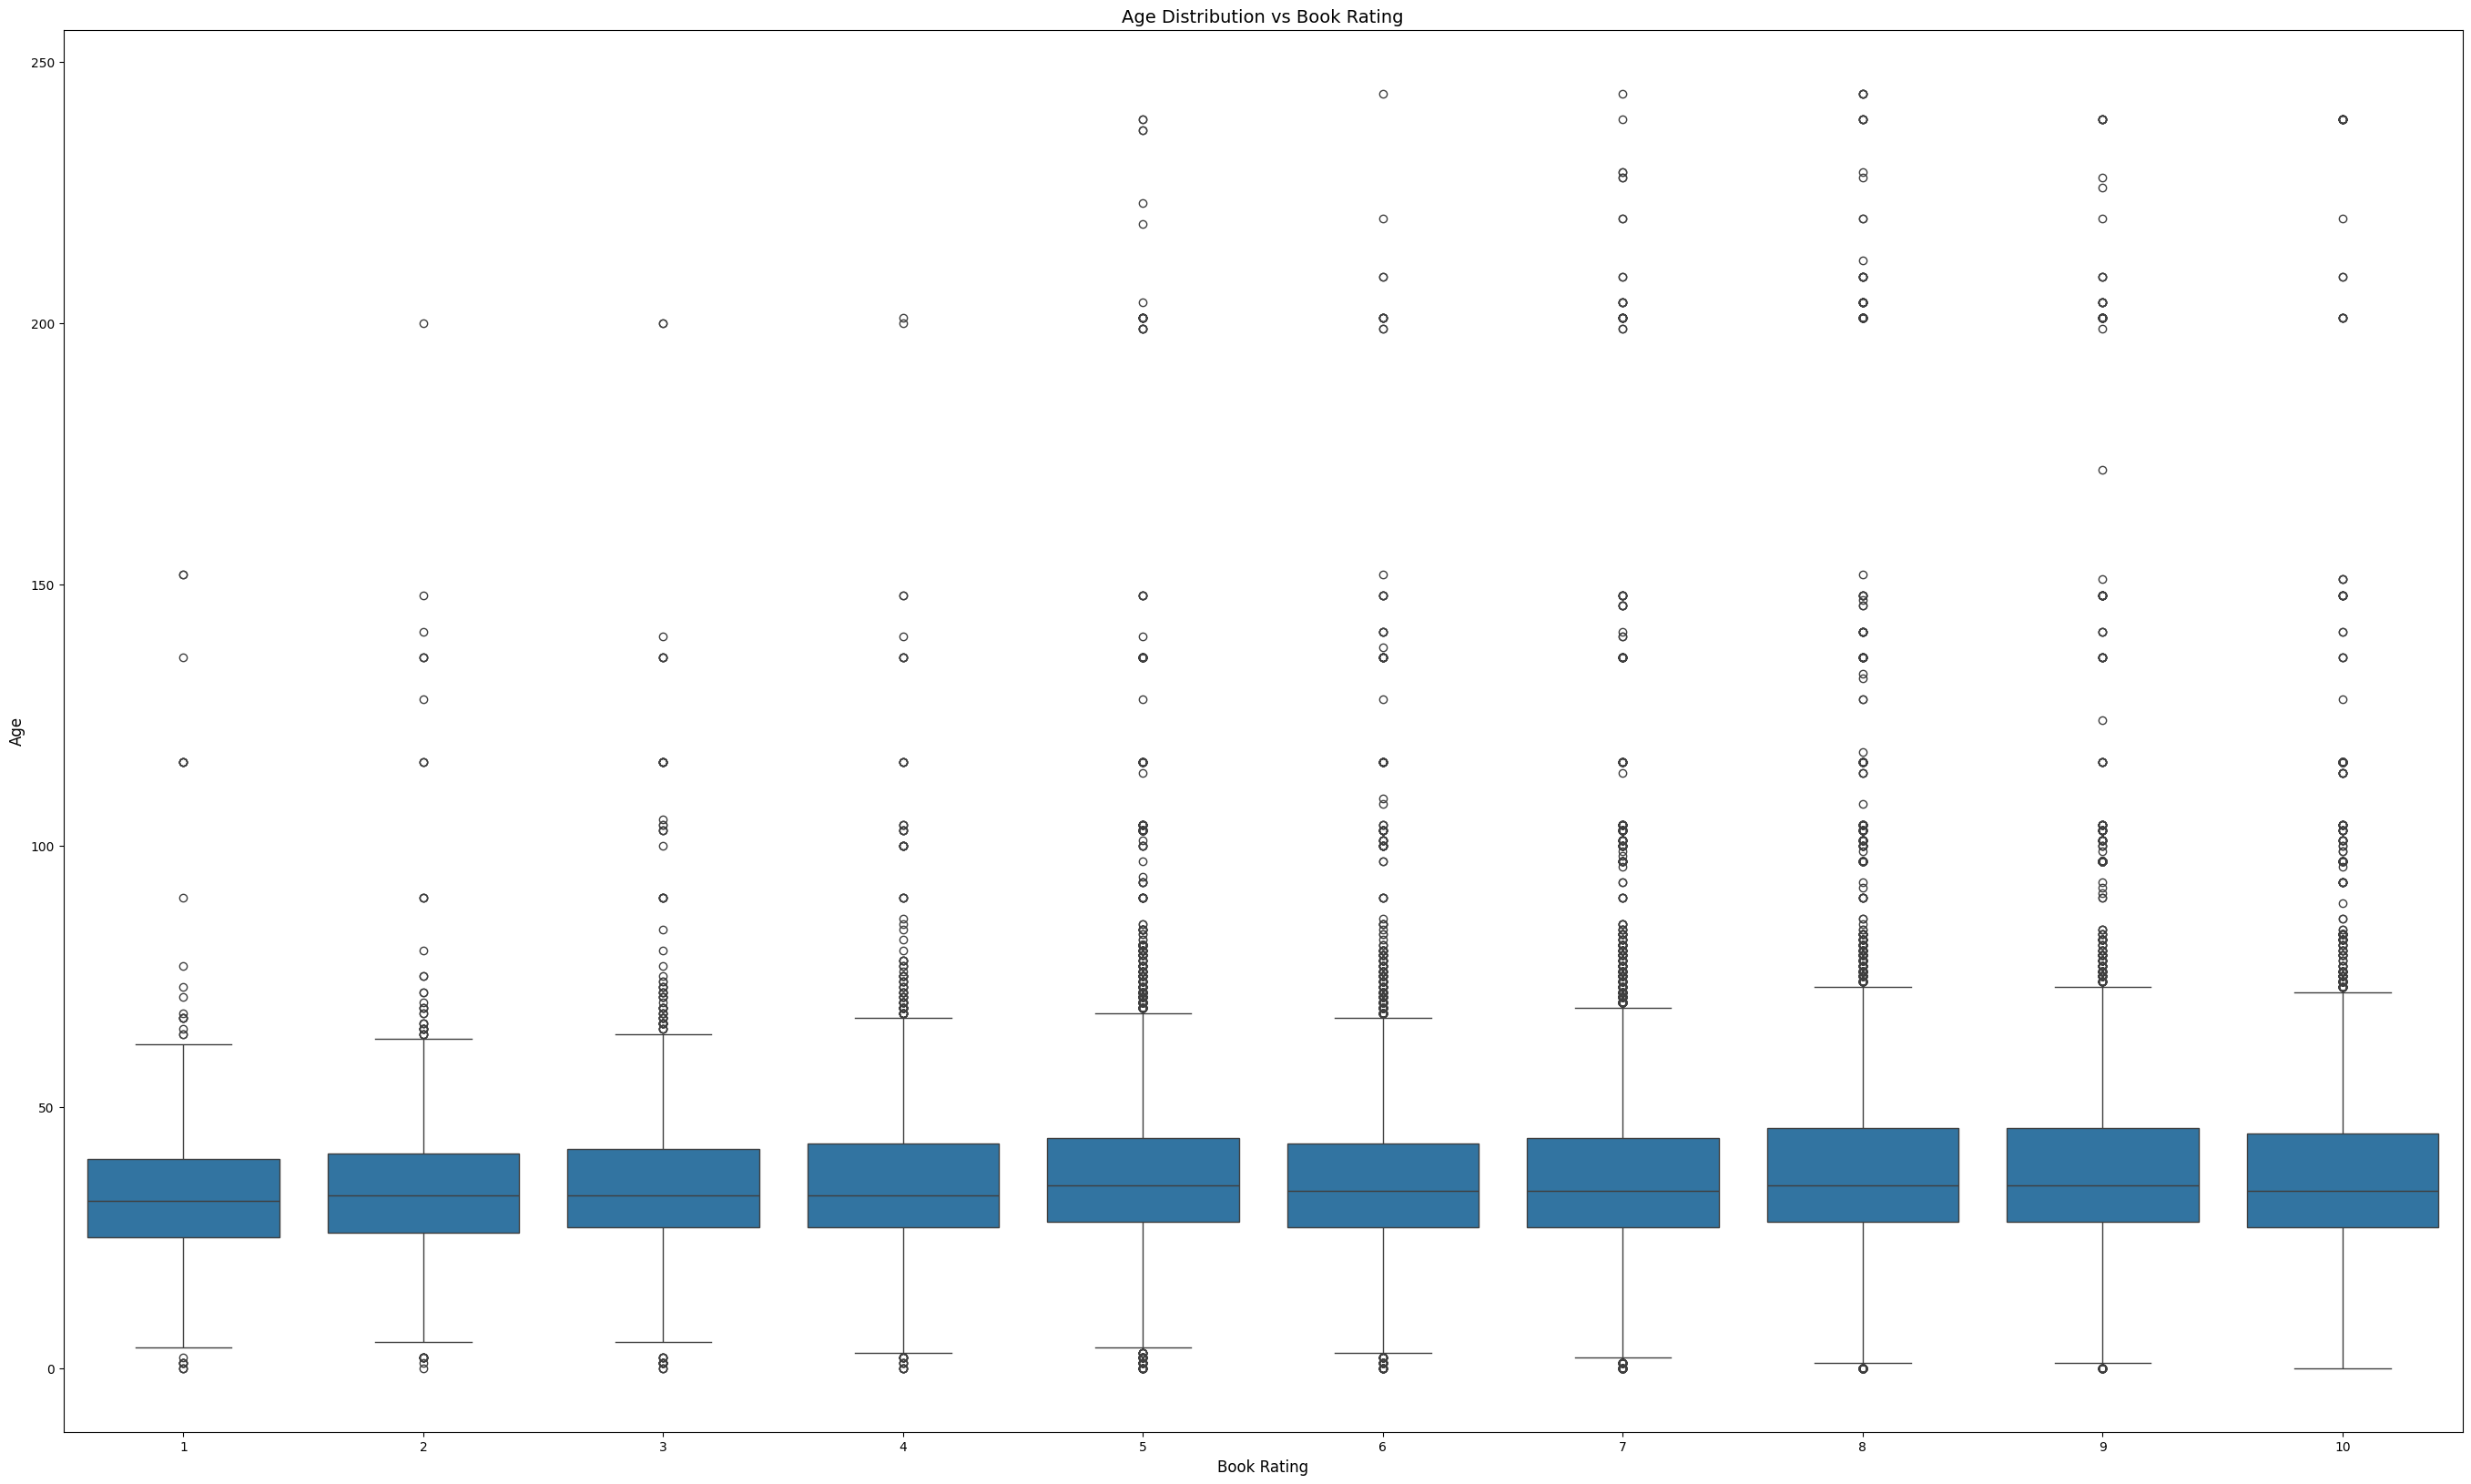

In [305]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(34, 20))   # width, height in inches
sns.boxplot(x='Book-Rating', y='Age', data=ur[ur['Book-Rating'] > 0])

plt.title("Age Distribution vs Book Rating", fontsize=14)
plt.xlabel("Book Rating", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.show()


In [306]:
users['Age'].max()

244.0

In [307]:
ratings['ISBN'].value_counts().head(10)


ISBN
0316666343    707
0971880107    581
0385504209    487
0312195516    383
0679781587    333
0060928336    320
059035342X    313
0142001740    307
0446672211    295
044023722X    281
Name: count, dtype: int64

In [308]:
ratings.merge(books, on='ISBN')[['Book-Title','ISBN']].value_counts().head(10)


Book-Title                                                        ISBN      
The Lovely Bones: A Novel                                         0316666343    707
Wild Animus                                                       0971880107    581
The Da Vinci Code                                                 0385504209    487
The Red Tent (Bestselling Backlist)                               0312195516    383
Divine Secrets of the Ya-Ya Sisterhood: A Novel                   0060928336    320
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))  059035342X    313
The Secret Life of Bees                                           0142001740    307
Where the Heart Is (Oprah's Book Club (Paperback))                0446672211    295
A Painted House                                                   044023722X    281
Girl with a Pearl Earring                                         0452282152    278
Name: count, dtype: int64

In [309]:
explicit = ratings[ratings['Book-Rating'] > 0]

avg_rating = explicit.groupby('ISBN')['Book-Rating'].mean()
count_rating = explicit.groupby('ISBN')['Book-Rating'].count()


In [310]:
book_stats = pd.concat([avg_rating, count_rating], axis=1)
book_stats.columns = ['avg_rating', 'rating_count']


<Axes: xlabel='rating_count', ylabel='avg_rating'>

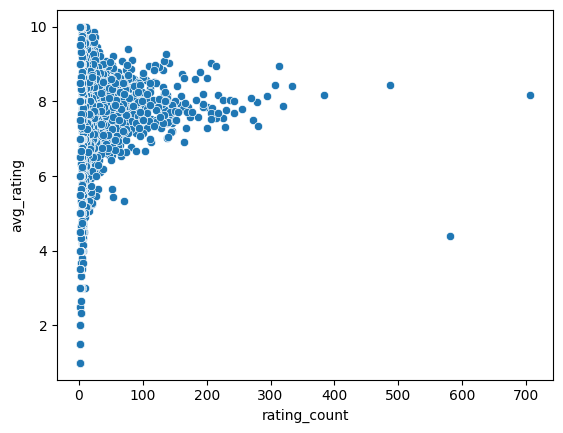

In [311]:
sns.scatterplot(x='rating_count', y='avg_rating', data=book_stats)


In [312]:
top_10 = book_stats[
    book_stats['rating_count'] >= 50
].sort_values('avg_rating', ascending=False).head(10)


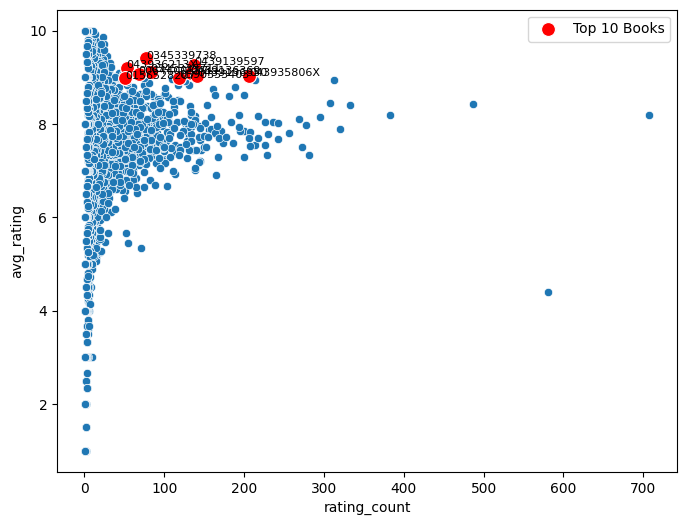

In [313]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))   # keep original look

# ORIGINAL scatter plot (unchanged)
sns.scatterplot(
    x='rating_count',
    y='avg_rating',
    data=book_stats
)

# Overlay TOP 10 books
sns.scatterplot(
    x='rating_count',
    y='avg_rating',
    data=top_10,
    color='red',
    s=100,
    label='Top 10 Books'
)

# Annotate top 10 (ISBN)
for isbn, row in top_10.iterrows():
    plt.text(
        row['rating_count'],
        row['avg_rating'],
        isbn,
        fontsize=8
    )

plt.legend()
plt.show()


In [314]:
users['Country'] = users['Location'].str.split(',').str[-1].str.strip()
users['Country'].value_counts().head(10)


Country
usa               139711
canada             21658
united kingdom     18538
germany            17043
spain              13147
australia          11784
italy              11266
                    4578
france              3455
portugal            3325
Name: count, dtype: int64

In [315]:
# Merge Users and Ratings
ur = ratings.merge(users, on='User-ID')

# Merge with Books to get book titles
ur_books = ur.merge(books, on='ISBN')

In [316]:
# Count ratings per book per country
book_country_count = ur_books.groupby(['Country', 'Book-Title']).size().reset_index(name='count')

# Get the most popular book for each country
popular_books_country = book_country_count.loc[book_country_count.groupby('Country')['count'].idxmax()]
popular_books_country


,Country,Book-Title,count
6435,,The Lovely Bones: A Novel,41
7895,"\""n/a\""""",Tots els contes (Llibres a mÃ ),1
7896,afghanistan,In Retrospect: The Tragedy and Lessons of Vietnam,1
7899,alachua,NO MERCY,1
7900,albania,Bad Heir Day,1
...,...,...,...
183347,worcester,Suzanne's Diary for Nicholas,1
183348,ysa,Side effects,1
183350,yugoslavia,Complete Works of William Shakespeare (Wordswo...,1
183354,zambia,The Girl Who Loved Tom Gordon,1


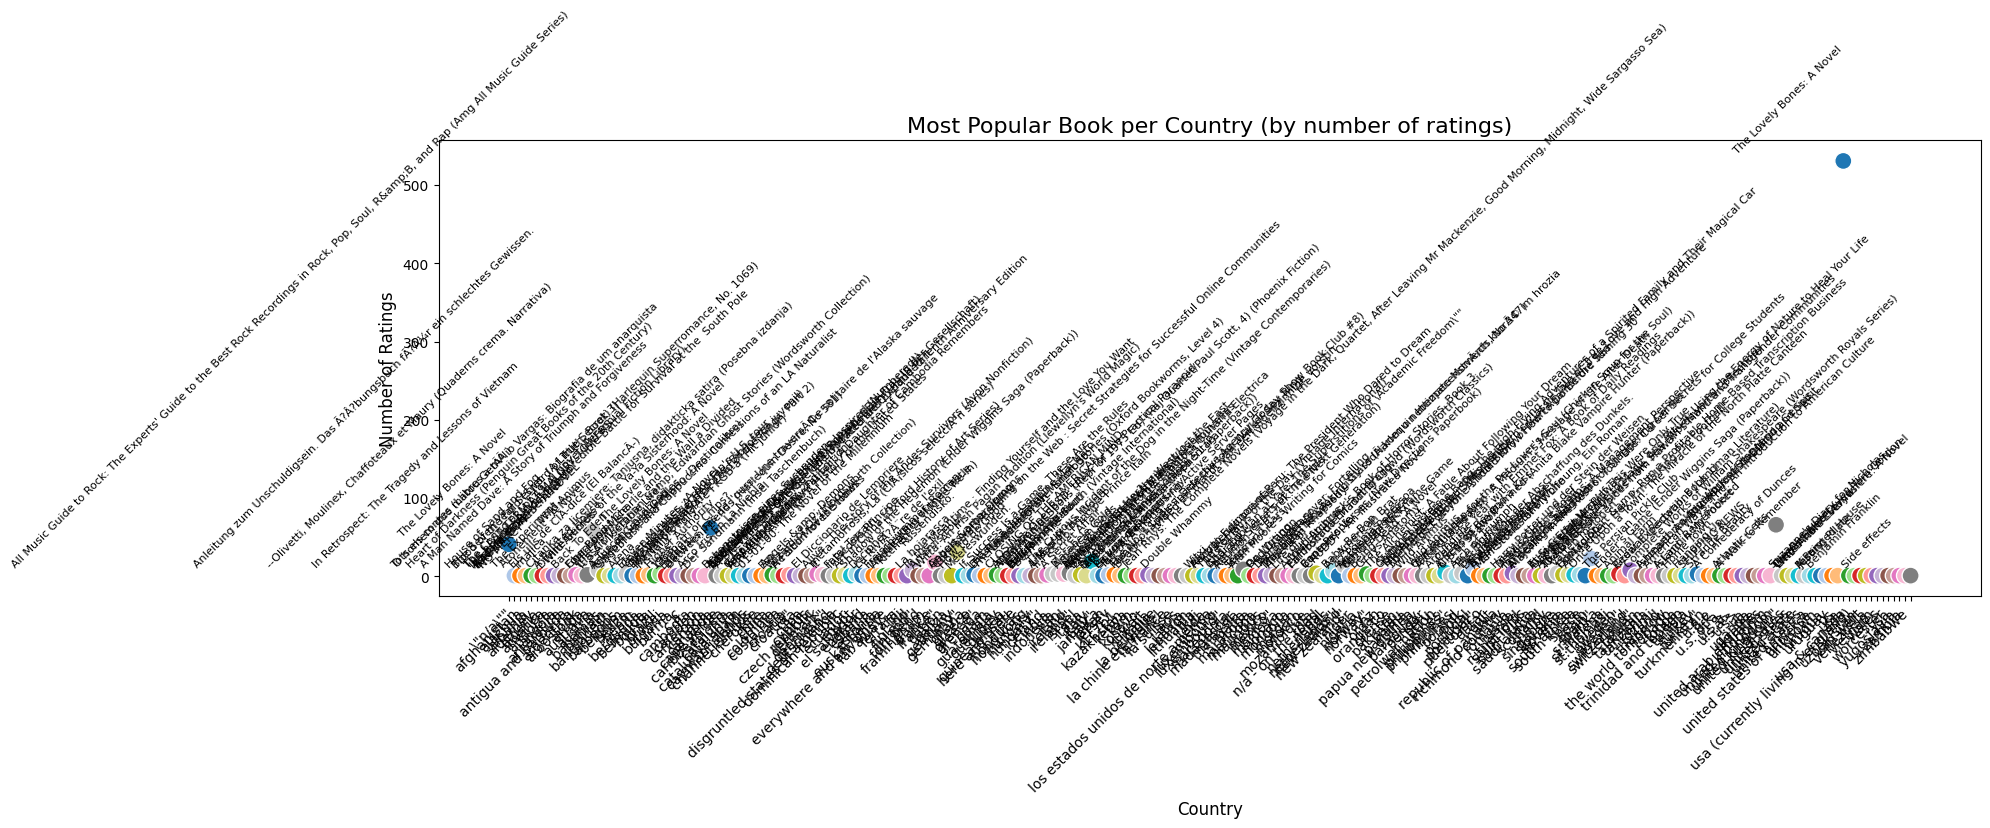

In [317]:
plt.figure(figsize=(20,8))  # wider figure

sns.scatterplot(
    data=popular_books_country, 
    x='Country', 
    y='count', 
    hue='Book-Title', 
    s=150, 
    palette='tab20'
)

# Annotate book names with better spacing
for i in range(popular_books_country.shape[0]):
    plt.text(
        x=i,  # use index for better alignment
        y=popular_books_country['count'].iloc[i]+10,  # slightly higher
        s=popular_books_country['Book-Title'].iloc[i],
        rotation=45,  # rotate text to reduce overlap
        horizontalalignment='right',
        fontsize=8
    )

plt.xticks(ticks=range(popular_books_country.shape[0]), labels=popular_books_country['Country'], rotation=45, ha='right')
plt.title('Most Popular Book per Country (by number of ratings)', fontsize=16)
plt.ylabel('Number of Ratings', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.legend([],[], frameon=False)  # remove legend
plt.tight_layout()
plt.show()


# popularity based recoomendation system

In [318]:
ratings

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6
...,...,...,...
1149773,276704,0806917695,5
1149775,276704,1563526298,9
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [319]:
#merging ratings and books
ratings_with_name = ratings.merge(books,on='ISBN')

In [320]:
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
4,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...
...,...,...,...,...,...,...,...,...,...,...
383837,276704,0743211383,7,Dreamcatcher,Stephen King,2001,Scribner,http://images.amazon.com/images/P/0743211383.0...,http://images.amazon.com/images/P/0743211383.0...,http://images.amazon.com/images/P/0743211383.0...
383838,276704,0806917695,5,Perplexing Lateral Thinking Puzzles: Scholasti...,Paul Sloane,1997,Sterling Publishing,http://images.amazon.com/images/P/0806917695.0...,http://images.amazon.com/images/P/0806917695.0...,http://images.amazon.com/images/P/0806917695.0...
383839,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
383840,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...


In [321]:
user_rating_counts = (
    ratings_with_name[ratings_with_name['Book-Rating'] != 0]
    .groupby('User-ID')
    .size()
)


In [322]:
user_rating_counts

User-ID
8          7
9          1
12         1
14         3
16         1
          ..
278846     1
278849     1
278851    14
278852     1
278854     6
Length: 68091, dtype: int64

In [323]:
user_rating_summary = (
    ratings_with_name.groupby('User-ID')['Book-Rating']
      .agg(
          non_zero_ratings=lambda x: (x != 0).sum(),
          zero_ratings=lambda x: (x == 0).sum()
      )
      .reset_index()
)


In [324]:
user_rating_summary

,User-ID,non_zero_ratings,zero_ratings
0,8,7,0
1,9,1,0
2,12,1,0
3,14,3,0
4,16,1,0
...,...,...,...
68086,278846,1,0
68087,278849,1,0
68088,278851,14,0
68089,278852,1,0


In [325]:
# Group by Book-Title and ISBN
book_summary = ratings_with_name.groupby(['Book-Title', 'ISBN']).agg(
    non_zero_ratings=('Book-Rating', lambda x: (x != 0).sum()),
    zero_ratings=('Book-Rating', lambda x: (x == 0).sum())
).reset_index()

# View the DataFrame
book_summary


,Book-Title,ISBN,non_zero_ratings,zero_ratings
0,A Light in the Storm: The Civil War Diary of ...,0590567330,1,0
1,"Ask Lily (Young Women of Faith: Lily Series, ...",0310232546,1,0
2,Dark Justice,0399151788,1,0
3,Earth Prayers From around the World: 365 Pray...,006250746X,7,0
4,Final Fantasy Anthology: Official Strategy Gu...,1566869250,2,0
...,...,...,...,...
149831,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,3724303432,1,0
149832,Ã?Â?rger mit Produkt X. Roman.,325721538X,3,0
149833,Ã?Â?sterlich leben.,3451274973,1,0
149834,Ã?Â?stlich der Berge.,3442725739,1,0


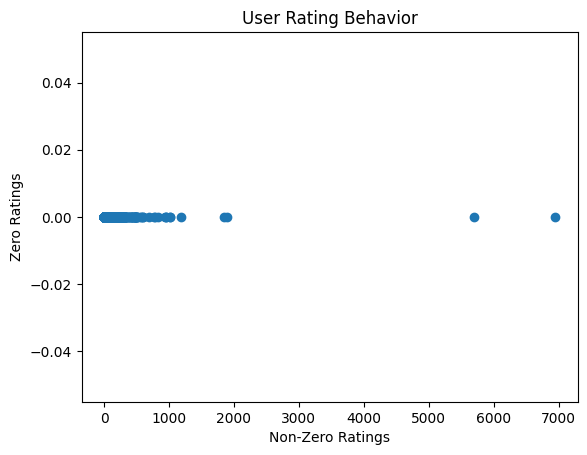

In [326]:
plt.figure()
plt.scatter(
    user_rating_summary['non_zero_ratings'],
    user_rating_summary['zero_ratings']
)
plt.xlabel('Non-Zero Ratings')
plt.ylabel('Zero Ratings')
plt.title('User Rating Behavior')
plt.show()


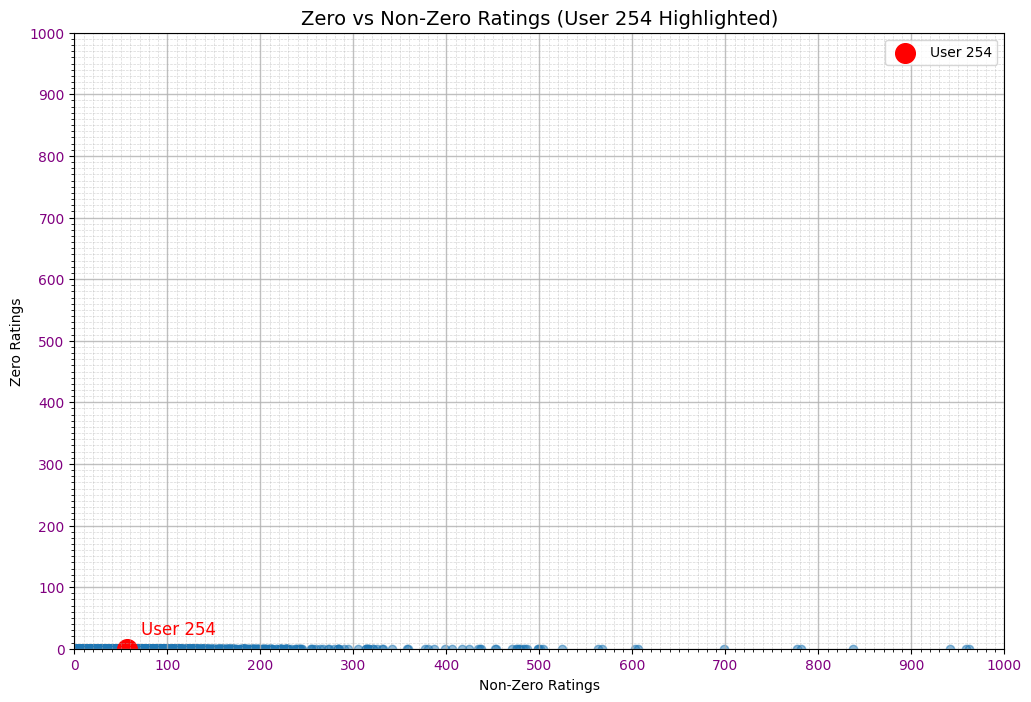

In [327]:
import matplotlib.pyplot as plt
import numpy as np

# Extract user 254
user_254 = user_rating_summary[user_rating_summary['User-ID'] == 254]

plt.figure(figsize=(12, 8))

# Plot all users
plt.scatter(
    user_rating_summary['non_zero_ratings'],
    user_rating_summary['zero_ratings'],
    alpha=0.5
)

# Highlight user 254
plt.scatter(
    user_254['non_zero_ratings'],
    user_254['zero_ratings'],
    s=200,
    color='red',
    label='User 254'
)

# Annotate User 254
plt.annotate(
    'User 254',
    (
        user_254['non_zero_ratings'].values[0],
        user_254['zero_ratings'].values[0]
    ),
    xytext=(10, 10),
    textcoords='offset points',
    color='red',
    fontsize=12
)

# Set axes limits
plt.xlim(0, 1000)
plt.ylim(0, 1000)

# Major ticks every 100 (labeled)
major_ticks = np.arange(0, 1001, 100)
plt.xticks(major_ticks, color='purple')
plt.yticks(major_ticks, color='purple')

# Minor ticks every 10 (unlabeled)
minor_ticks = np.arange(0, 1001, 10)
plt.gca().set_xticks(minor_ticks, minor=True)
plt.gca().set_yticks(minor_ticks, minor=True)

# Optional: make minor ticks visible with lighter grid lines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.5)  # dashed grid for minor
plt.grid(which='major', linestyle='-', linewidth=1, alpha=0.8)      # solid grid for major

plt.xlabel('Non-Zero Ratings')
plt.ylabel('Zero Ratings')
plt.title('Zero vs Non-Zero Ratings (User 254 Highlighted)', fontsize=14)
plt.legend()
plt.show()


In [328]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns = {'Book-Rating':'num_ratings'},inplace =True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,1
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1
2,Dark Justice,1
3,Earth Prayers From around the World: 365 Pray...,7
4,Final Fantasy Anthology: Official Strategy Gu...,2
...,...,...
135562,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1
135563,Ã?Â?rger mit Produkt X. Roman.,3
135564,Ã?Â?sterlich leben.,1
135565,Ã?Â?stlich der Berge.,1


In [329]:
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns = {'Book-Rating':'avg_ratings'},inplace =True)
avg_rating_df

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
2,Dark Justice,10.000000
3,Earth Prayers From around the World: 365 Pray...,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,10.000000
...,...,...
135562,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,8.000000
135563,Ã?Â?rger mit Produkt X. Roman.,7.000000
135564,Ã?Â?sterlich leben.,7.000000
135565,Ã?Â?stlich der Berge.,8.000000


In [330]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,1,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
2,Dark Justice,1,10.000000
3,Earth Prayers From around the World: 365 Pray...,7,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,2,10.000000
...,...,...,...
135562,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1,8.000000
135563,Ã?Â?rger mit Produkt X. Roman.,3,7.000000
135564,Ã?Â?sterlich leben.,1,7.000000
135565,Ã?Â?stlich der Berge.,1,8.000000


In [331]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_ratings',ascending = False).head(50)

In [332]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_ratings']]

In [333]:
popular_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,277,9.043321
3,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,267,8.977528
11,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,315,8.936508
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,326,8.840491
16,"Tuesdays with Morrie: An Old Man, a Young Man,...",MITCH ALBOM,http://images.amazon.com/images/P/0385484518.0...,250,8.588000
19,The Secret Life of Bees,Sue Monk Kidd,http://images.amazon.com/images/P/0142001740.0...,406,8.477833
25,The Da Vinci Code,Dan Brown,http://images.amazon.com/images/P/0385504209.0...,494,8.439271
31,The Lovely Bones: A Novel,Alice Sebold,http://images.amazon.com/images/P/0316666343.0...,707,8.185290
32,The Red Tent (Bestselling Backlist),Anita Diamant,http://images.amazon.com/images/P/0312195516.0...,383,8.182768
33,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,http://images.amazon.com/images/P/0446672211.0...,295,8.142373


## Collabarative Filtering Based Recommender System


In [349]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 10
padhe_likhe_users = x[x].index


In [350]:
x

User-ID
8         False
9         False
12        False
14        False
16        False
          ...  
278846    False
278849    False
278851     True
278852    False
278854    False
Name: Book-Rating, Length: 68091, dtype: bool

In [351]:
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
4,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...
...,...,...,...,...,...,...,...,...,...,...
383837,276704,0743211383,7,Dreamcatcher,Stephen King,2001,Scribner,http://images.amazon.com/images/P/0743211383.0...,http://images.amazon.com/images/P/0743211383.0...,http://images.amazon.com/images/P/0743211383.0...
383838,276704,0806917695,5,Perplexing Lateral Thinking Puzzles: Scholasti...,Paul Sloane,1997,Sterling Publishing,http://images.amazon.com/images/P/0806917695.0...,http://images.amazon.com/images/P/0806917695.0...,http://images.amazon.com/images/P/0806917695.0...
383839,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
383840,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...


In [352]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]

In [359]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=12
famous_books = y[y].index

In [360]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [361]:
pt = final_ratings.pivot_table(index = 'Book-Title',columns = 'User-ID',values = 'Book-Rating')

In [362]:
pt.fillna(0,inplace=True)

In [363]:
pt

User-ID,242,243,254,388,446,503,505,507,638,643,...,278221,278356,278390,278418,278535,278554,278582,278633,278843,278851
Book-Title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"14,000 Things to Be Happy About",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\O\"" Is for Outlaw""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
"\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [364]:
!pip install scikit-learn


In [365]:
from sklearn.metrics.pairwise import cosine_similarity
print("scikit-learn imported successfully!")


scikit-learn imported successfully!


In [366]:
similarity_scores = cosine_similarity(pt)

In [367]:
similarity_scores

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.04643417, 0.        ,
        0.05951361],
       ...,
       [0.        , 0.        , 0.04643417, ..., 1.        , 0.        ,
        0.08894652],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.05951361, ..., 0.08894652, 0.        ,
        1.        ]])

In [368]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]

    for i in similar_items:
        print(pt.index[i[0]])
  

In [369]:
recommend('The Notebook')

Message in a Bottle
A Walk to Remember
Suzanne's Diary for Nicholas
Nights in Rodanthe
The Rescue


In [370]:
pt[pt[254] != 0][254]


Book-Title
1984                                                                         9.0
American Gods                                                               10.0
American Gods: A Novel                                                       9.0
Animal Farm                                                                  8.0
Complete Chronicles of Narnia                                                5.0
Harry Potter and the Chamber of Secrets (Book 2)                             9.0
Harry Potter and the Goblet of Fire (Book 4)                                 9.0
Harry Potter and the Prisoner of Azkaban (Book 3)                            9.0
Harry Potter and the Sorcerer's Stone (Book 1)                               9.0
Making Minty Malone                                                          7.0
Neverwhere                                                                  10.0
She's Come Undone (Oprah's Book Club)                                        7.0
Smoke and Mirrors

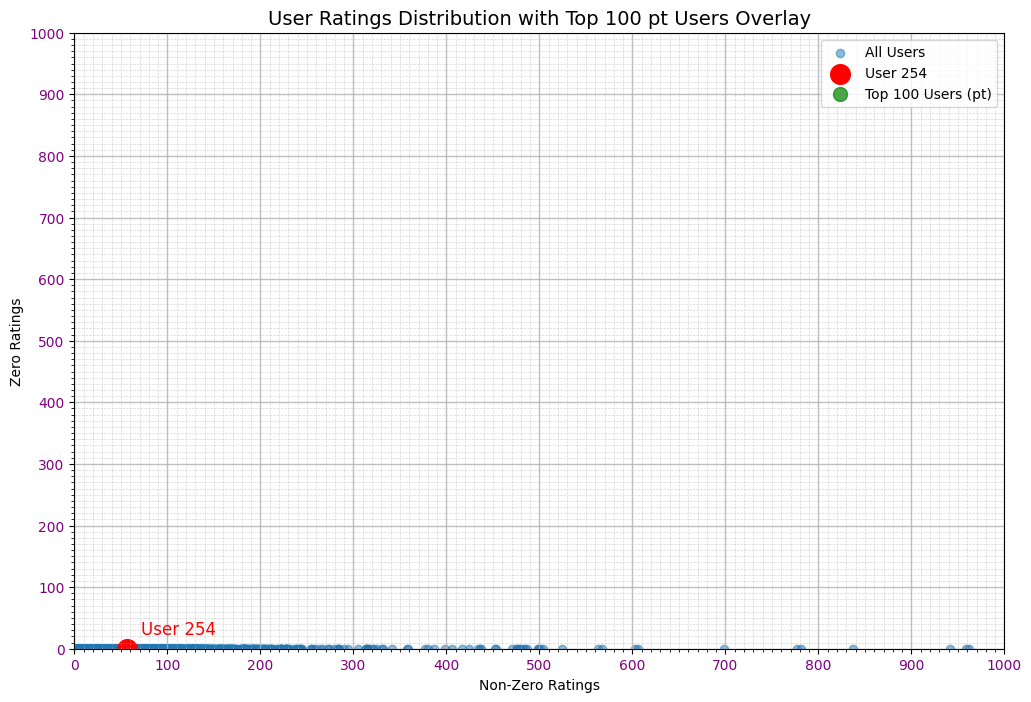

In [371]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- Extract User 254 from summary ---
user_254 = user_rating_summary[user_rating_summary['User-ID'] == 254]

# --- Get top 100 users from pt table ---
top_100_users = pt.columns[:100]  # first 100 users
pt_top_100 = pt[top_100_users]

# --- Count non-zero and zero ratings for these top 100 users ---
pt_summary = pd.DataFrame({
    'User-ID': pt_top_100.columns,
    'non_zero_ratings': (pt_top_100 != 0).sum(axis=0).values,
    'zero_ratings': (pt_top_100 == 0).sum(axis=0).values
})

# --- Plot user_rating_summary as base ---
plt.figure(figsize=(12, 8))
plt.scatter(
    user_rating_summary['non_zero_ratings'],
    user_rating_summary['zero_ratings'],
    alpha=0.5,
    label='All Users'
)

# Highlight User 254
plt.scatter(
    user_254['non_zero_ratings'],
    user_254['zero_ratings'],
    s=200,
    color='red',
    label='User 254'
)
plt.annotate(
    'User 254',
    (
        user_254['non_zero_ratings'].values[0],
        user_254['zero_ratings'].values[0]
    ),
    xytext=(10, 10),
    textcoords='offset points',
    color='red',
    fontsize=12
)

# --- Overlay pt top 100 points ---
plt.scatter(
    pt_summary['non_zero_ratings'],
    pt_summary['zero_ratings'],
    s=100,
    color='green',
    alpha=0.7,
    label='Top 100 Users (pt)'
)

# --- Axes limits and ticks ---
plt.xlim(0, 1000)
plt.ylim(0, 1000)

major_ticks = np.arange(0, 1001, 100)
plt.xticks(major_ticks, color='purple')
plt.yticks(major_ticks, color='purple')

minor_ticks = np.arange(0, 1001, 10)
plt.gca().set_xticks(minor_ticks, minor=True)
plt.gca().set_yticks(minor_ticks, minor=True)

# --- Grids ---
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.5)
plt.grid(which='major', linestyle='-', linewidth=1, alpha=0.8)

# Labels & Title
plt.xlabel('Non-Zero Ratings')
plt.ylabel('Zero Ratings')
plt.title('User Ratings Distribution with Top 100 pt Users Overlay', fontsize=14)
plt.legend()
plt.show()


In [372]:
# pt rows = Book-Title of famous books
famous_books_in_pt = pt.index  # these are the books used in pt

# Filter book_summary to only include famous books
famous_book_summary = book_summary[book_summary['Book-Title'].isin(famous_books_in_pt)]

# Optional: sort by non-zero ratings to get top 50
top_50_books = famous_book_summary.sort_values(by='non_zero_ratings', ascending=False).head(50)

# View the top 50 books
top_50_books


,Book-Title,ISBN,non_zero_ratings,zero_ratings
121861,The Lovely Bones: A Novel,0316666343,707,0
146201,Wild Animus,0971880107,581,0
113347,The Da Vinci Code,0385504209,487,0
127126,The Red Tent (Bestselling Backlist),0312195516,383,0
32954,Divine Secrets of the Ya-Ya Sisterhood: A Novel,0060928336,320,0
50030,Harry Potter and the Sorcerer's Stone (Harry P...,059035342X,313,0
128561,The Secret Life of Bees,0142001740,307,0
145228,Where the Heart Is (Oprah's Book Club (Paperba...,0446672211,295,0
3297,A Painted House,044023722X,281,0
46601,Girl with a Pearl Earring,0452282152,278,0
